In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


Column name	Description
ID	: Unique identifier for each user.
label	:Label indicating user churn status (e.g., churned, retained).
sessions: 	Number of sessions logged by the user.
drives:	Number of drives completed by the user.
total_sessions:	Total number of sessions recorded for the user.
n_days_after_onboarding:	Number of days since user onboarding.
total_navigations_fav1:	Total number of navigations using favorite route 1.
total_navigations_fav2:	Total number of navigations using favorite route 2.
driven_km_drives:	Total distance driven by the user in kilometers.
duration_minutes_drives:	Total duration of drives in minutes.
activity_days:	Number of days with user activity recorded.
driving_days:	Number of days with driving activity recorded.
device:	Device used by the user for navigation (e.g., smartphone, tablet).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('waze_app_dataset.csv')

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df.shape

(14999, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
round((df.isnull().sum()/df.shape[0]),2)

ID                         0.00
label                      0.05
sessions                   0.00
drives                     0.00
total_sessions             0.00
n_days_after_onboarding    0.00
total_navigations_fav1     0.00
total_navigations_fav2     0.00
driven_km_drives           0.00
duration_minutes_drives    0.00
activity_days              0.00
driving_days               0.00
device                     0.00
dtype: float64

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14999.0,NaN,NaN,NaN,7499.0,4329.982679,0.0,3749.5,7499.0,11248.5,14998.0
label,14299,2,retained,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sessions,14999.0,NaN,NaN,NaN,80.633776,80.699065,0.0,23.0,56.0,112.0,743.0
drives,14999.0,NaN,NaN,NaN,67.281152,65.913872,0.0,20.0,48.0,93.0,596.0
total_sessions,14999.0,NaN,NaN,NaN,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,NaN,NaN,NaN,1749.837789,1008.513876,4.0,878.0,1741.0,2623.5,3500.0
total_navigations_fav1,14999.0,NaN,NaN,NaN,121.605974,148.121544,0.0,9.0,71.0,178.0,1236.0
total_navigations_fav2,14999.0,NaN,NaN,NaN,29.672512,45.394651,0.0,0.0,9.0,43.0,415.0
driven_km_drives,14999.0,NaN,NaN,NaN,4039.340921,2502.149334,60.44125,2212.600607,3493.858085,5289.861262,21183.40189
duration_minutes_drives,14999.0,NaN,NaN,NaN,1860.976012,1446.702288,18.282082,835.99626,1478.249859,2464.362632,15851.72716


In [10]:
df1 = df.copy()

# EDA

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [15]:
df['ID'].nunique()

14999

In [16]:
df.drop('ID',axis =1 , inplace = True)

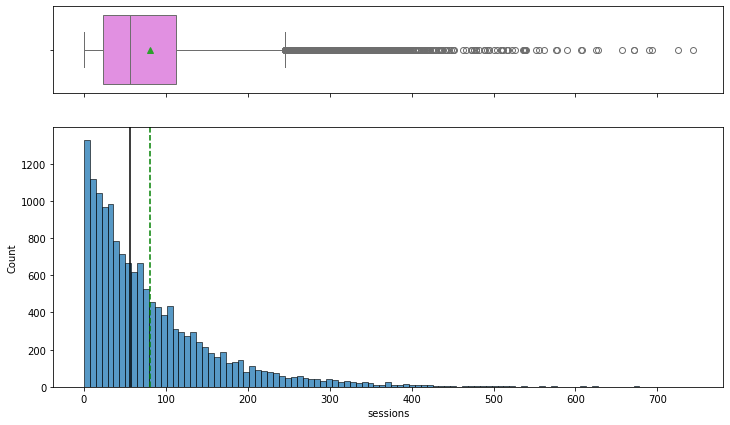

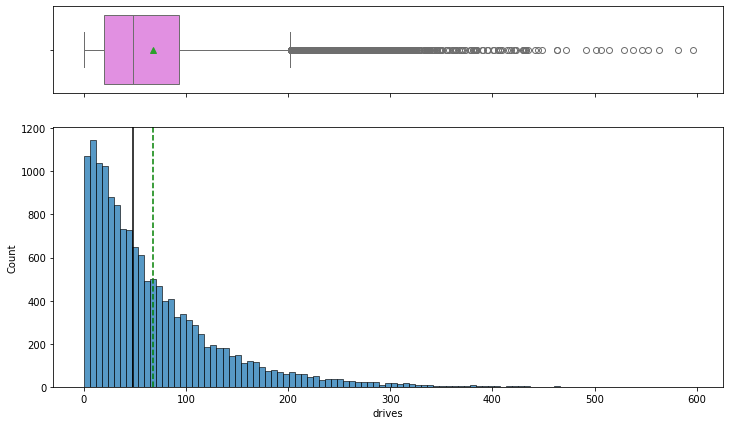

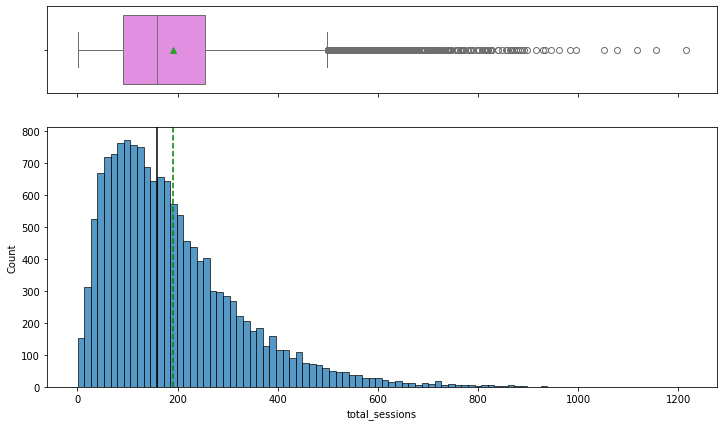

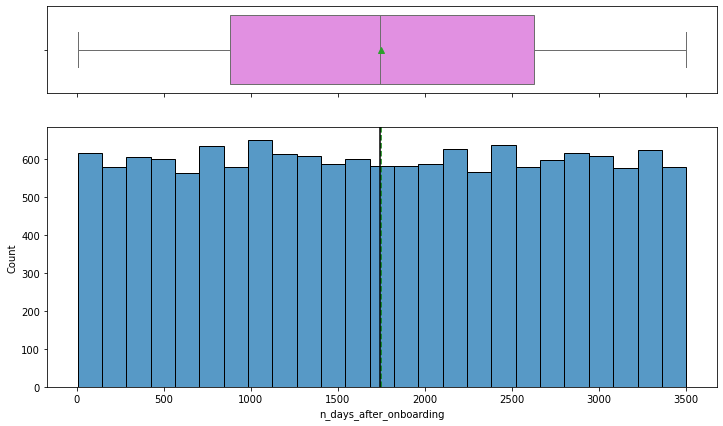

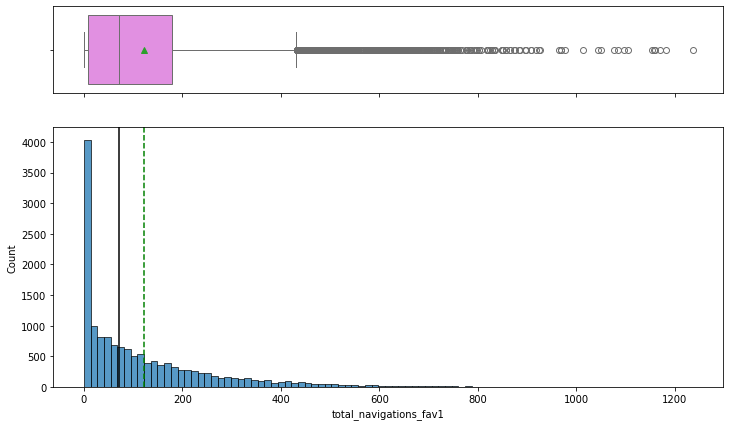

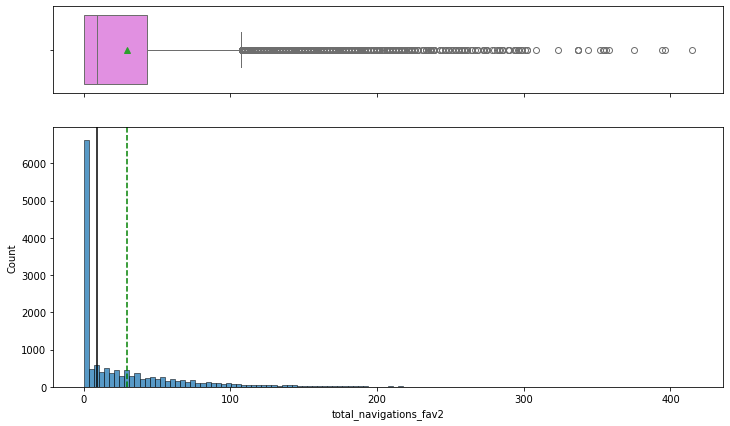

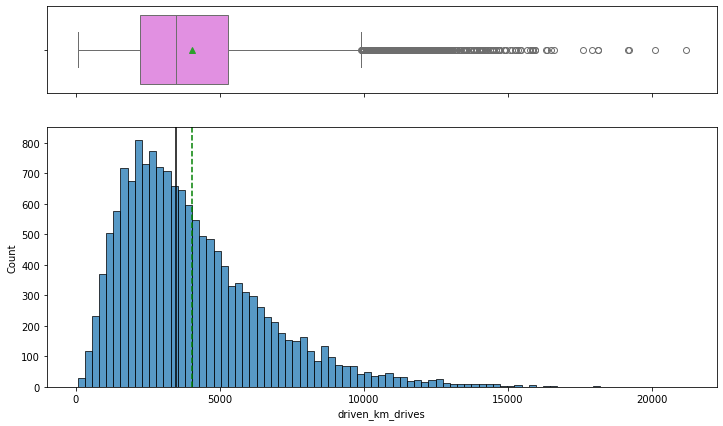

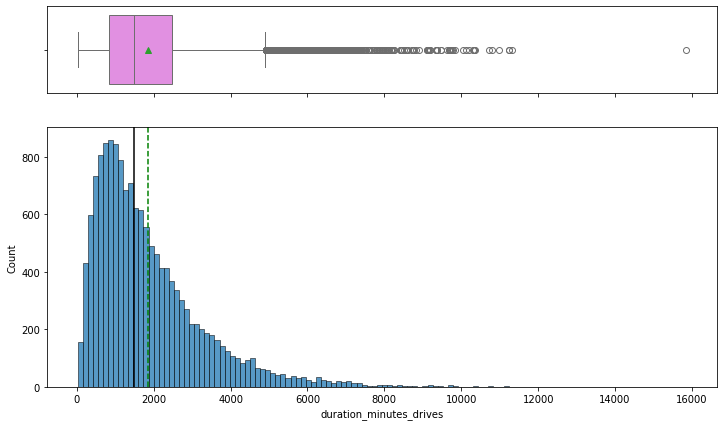

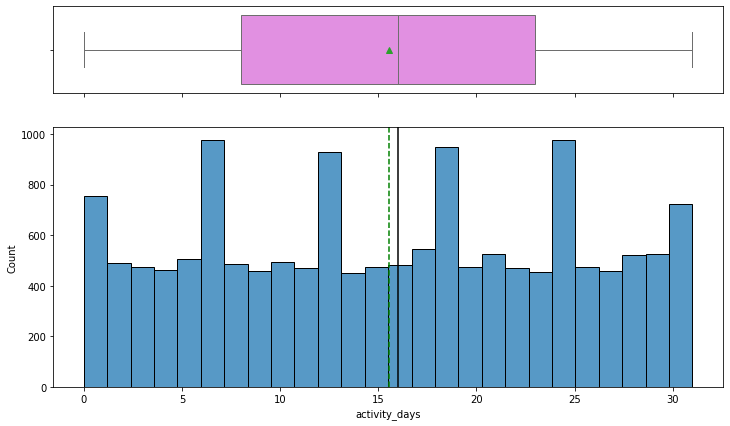

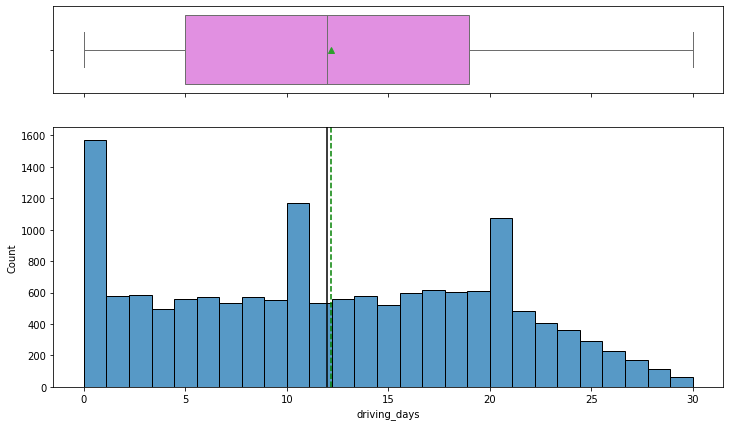

In [17]:
for i in df.columns:
    if df.dtypes[i] in ('int64','float64'):
        histogram_boxplot(df,i)

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


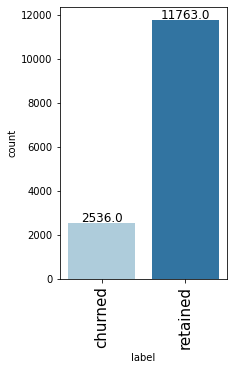

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


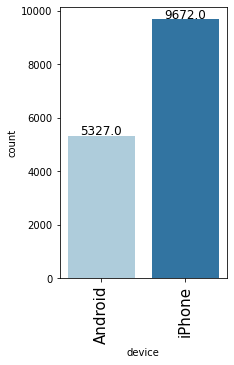

In [18]:
for i in df.columns:
    if df.dtypes[i] not in ('int64','float64'):
        labeled_barplot(df,i)

label    churned  retained    All
device                           
All         2536     11763  14299
iPhone      1645      7580   9225
Android      891      4183   5074
------------------------------------------------------------------------------------------------------------------------


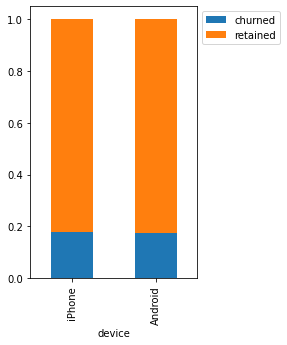

In [19]:
stacked_barplot(df,'device','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


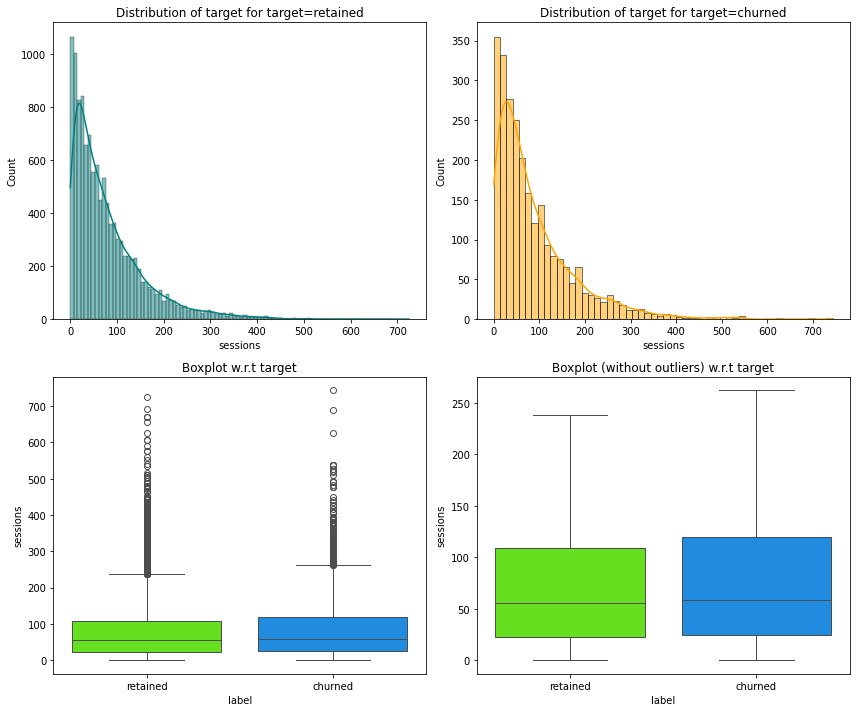

In [20]:
distribution_plot_wrt_target(df,'sessions','label')

In [21]:
df.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


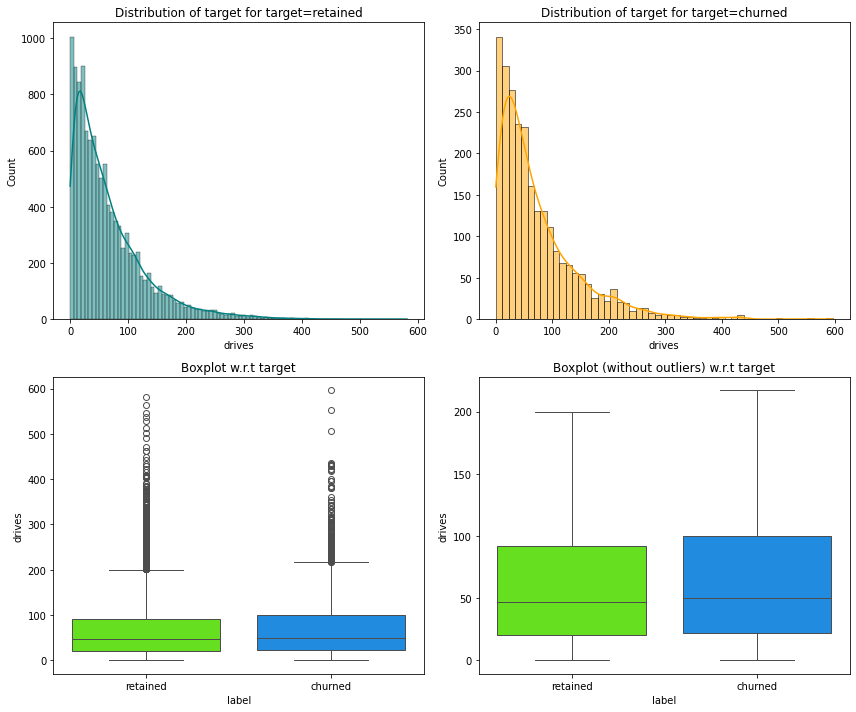

In [22]:
distribution_plot_wrt_target(df,'drives','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


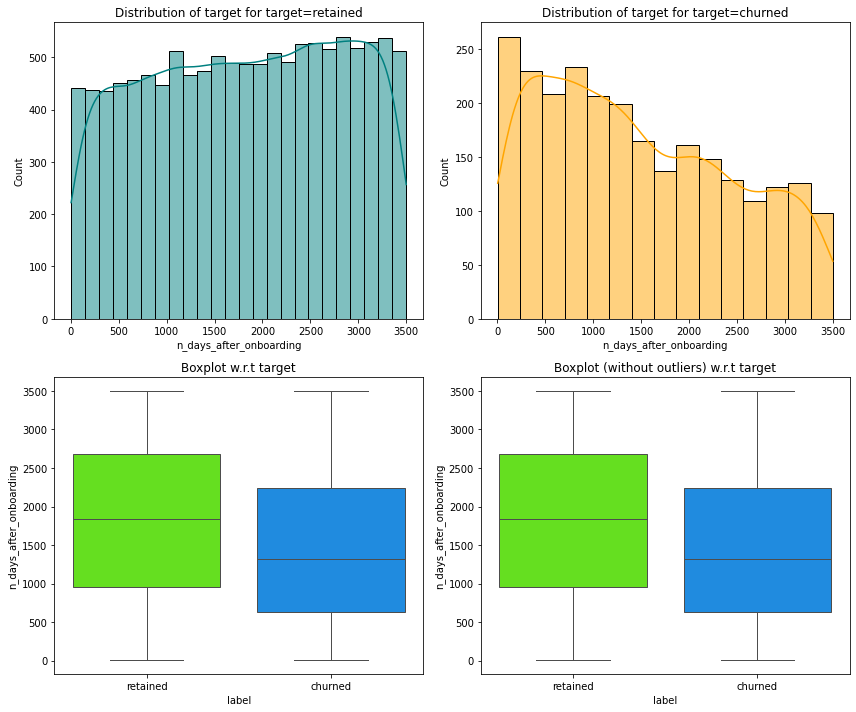

In [23]:
distribution_plot_wrt_target(df,'n_days_after_onboarding','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


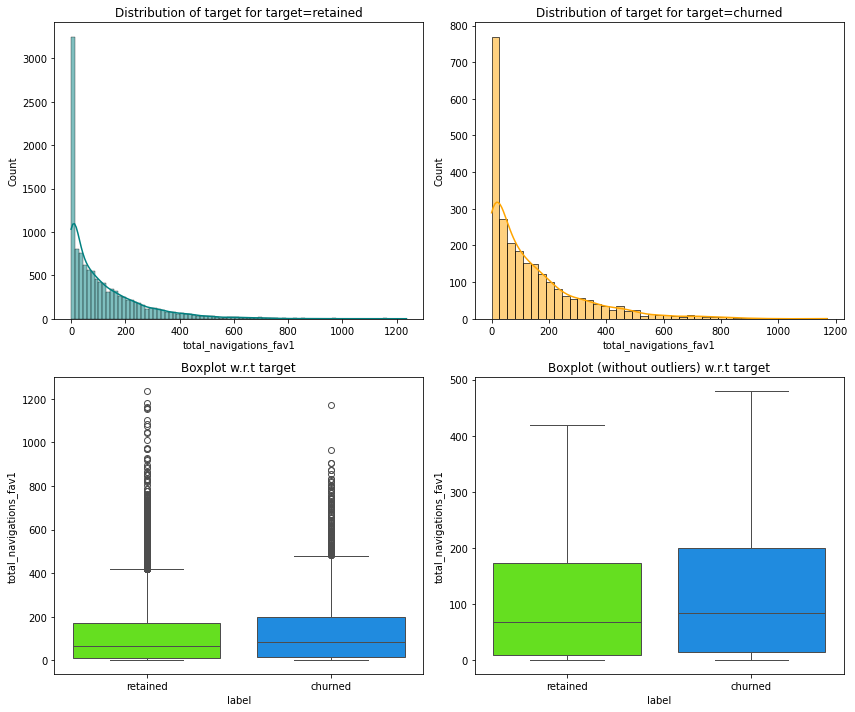

In [24]:
distribution_plot_wrt_target(df,'total_navigations_fav1','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


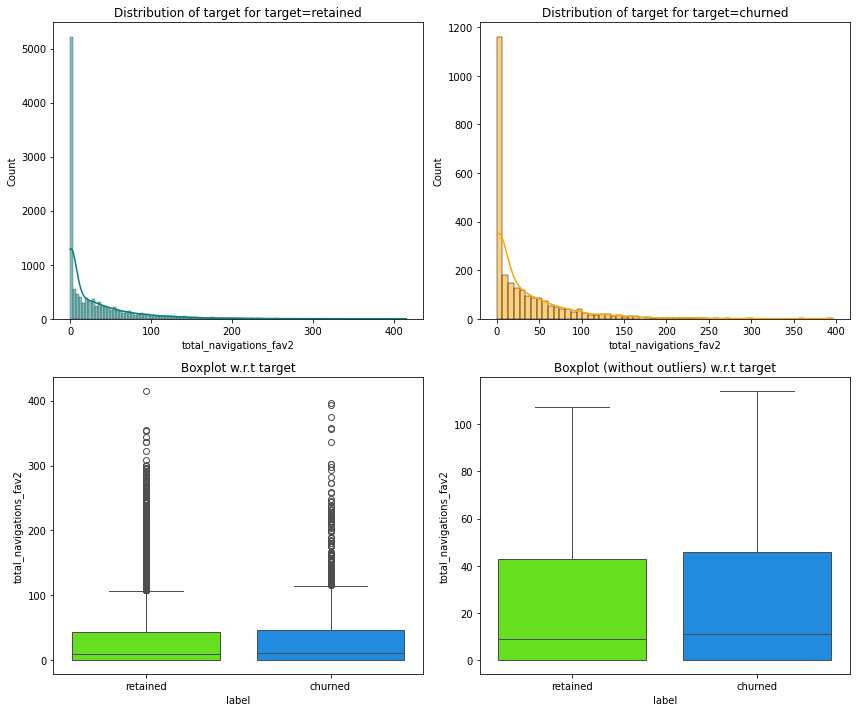

In [25]:
distribution_plot_wrt_target(df,'total_navigations_fav2','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


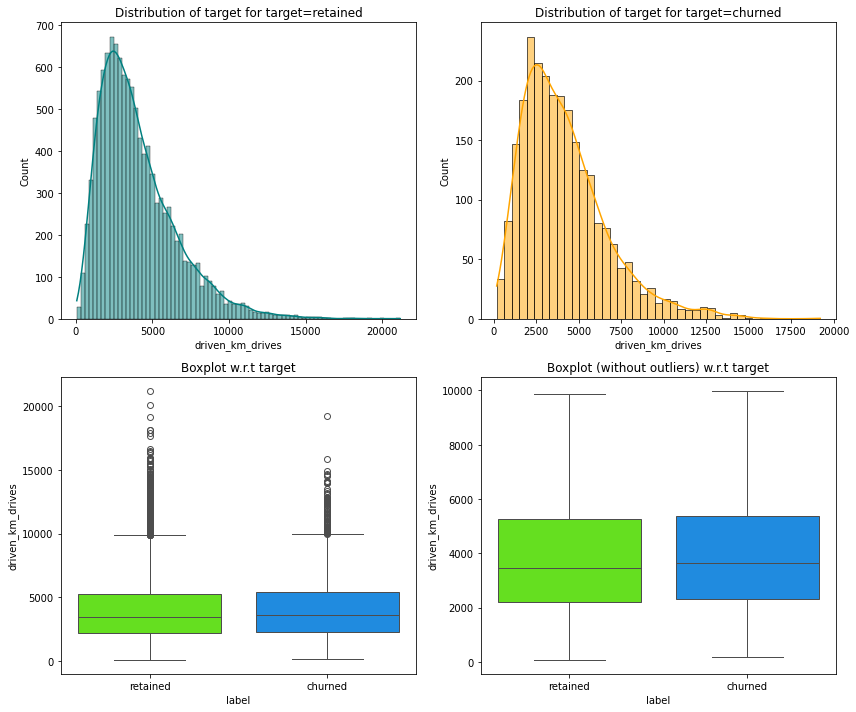

In [26]:
distribution_plot_wrt_target(df,'driven_km_drives','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


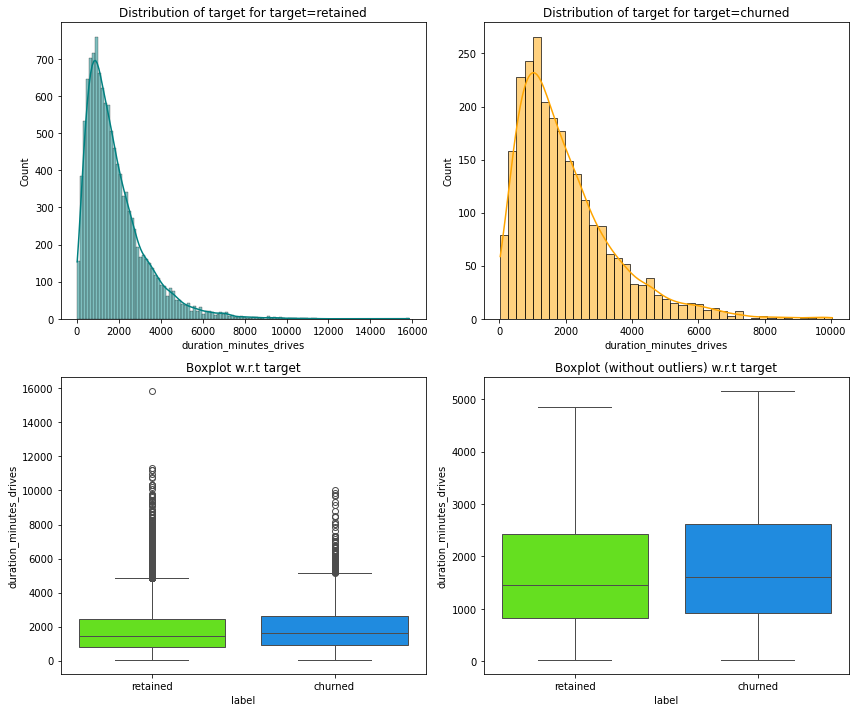

In [27]:
distribution_plot_wrt_target(df,'duration_minutes_drives','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


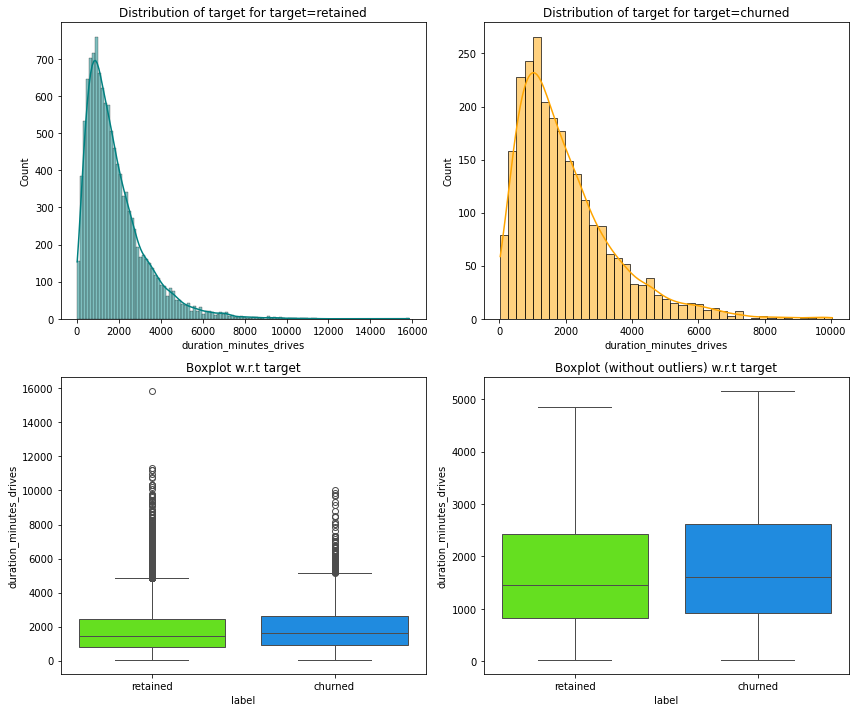

In [28]:
distribution_plot_wrt_target(df,'duration_minutes_drives','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


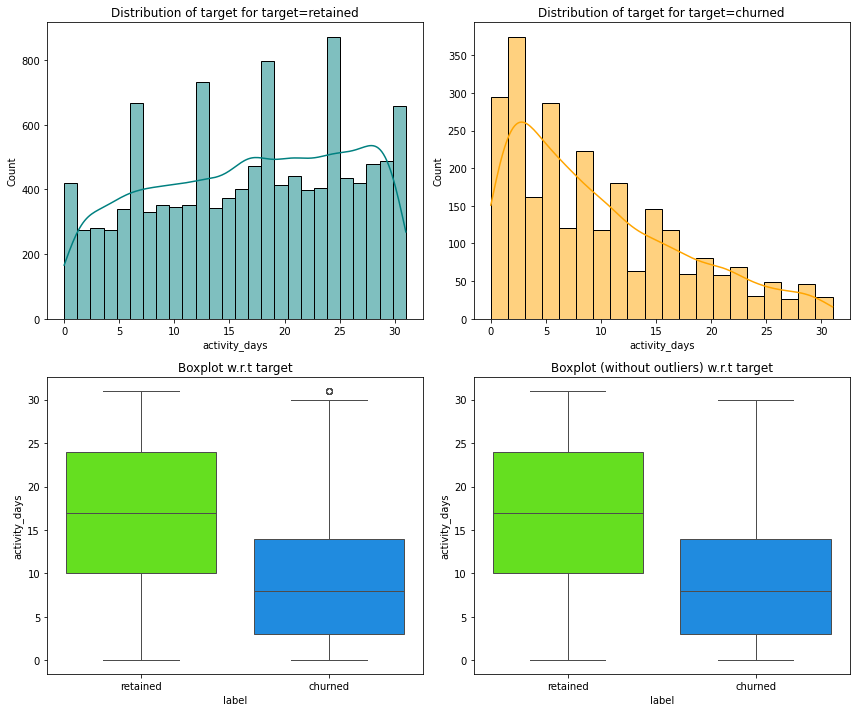

In [29]:
distribution_plot_wrt_target(df,'activity_days','label')

/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/var/folders/vs/59442z1s2hb9ptq6wpvzf6b40000gn/T/ipykernel_12720/322972393.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


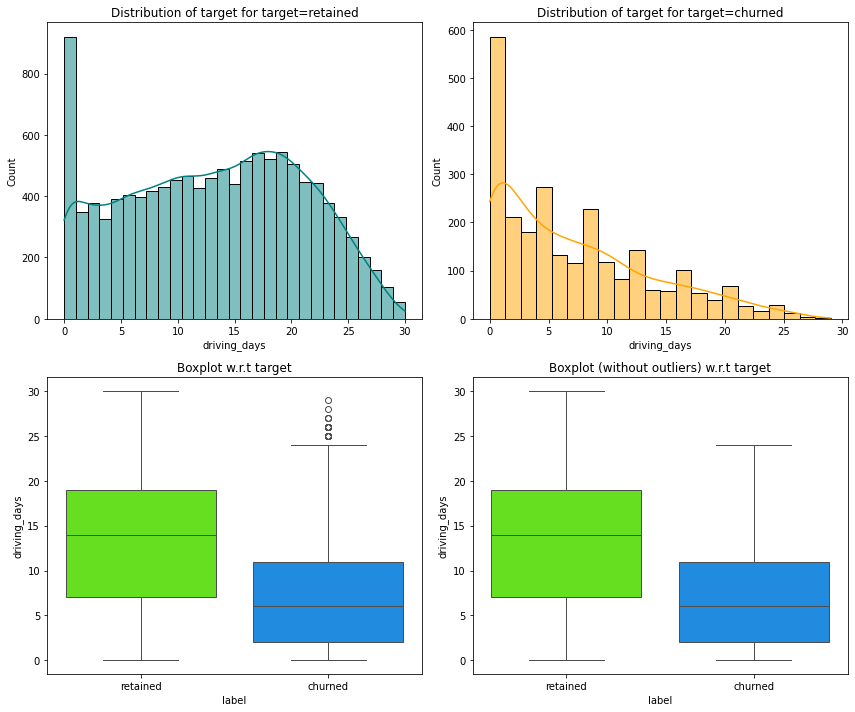

In [30]:
distribution_plot_wrt_target(df,'driving_days','label')

In [31]:
num_col = df.select_dtypes(include= ['int64','float64']).columns

print(num_col)

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days'],
      dtype='object')


<Axes: >

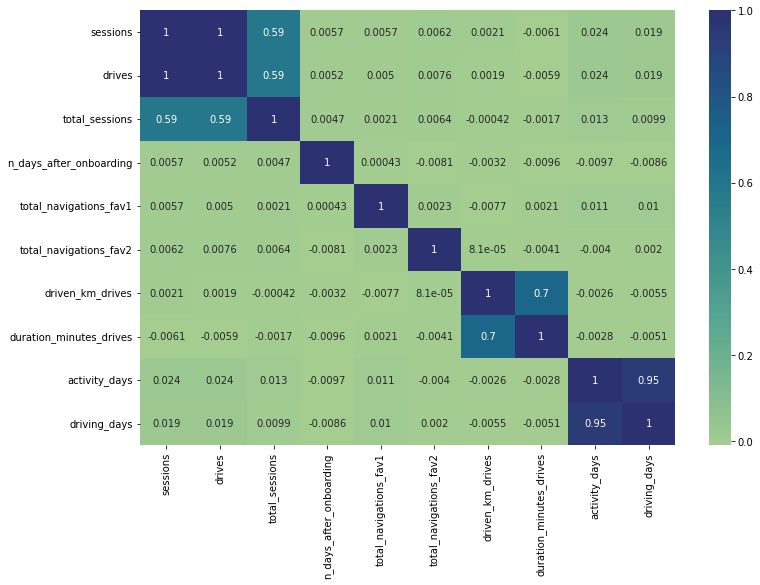

In [34]:
plt.figure(figsize = (12,8))
sns.heatmap(df[num_col].corr(),annot=True,cmap= 'crest')